[View in Colaboratory](https://colab.research.google.com/github/vksmgr/colab/blob/master/First__linear_regression.ipynb)

#linear regression
in this module we will solve the simple problem and the interpret the accuracy of the model

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import train_test_split
# First we will read data form the file
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The problem statement is we want to predict the price of the house. so we have our Y variable is price.

 we will find the feature which will contribute to the price prediction.

In [11]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

 we wil start from basic first we will consider only single variable then we will add more feature in it

In [12]:
# Y = b0 + b1X

# basically price is depend on the total area of the house
# we wil calculate the area
# sqft_leaving + sqft_lot 
data['area_total'] = data['sqft_living'] + data['sqft_lot']
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_total
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,6830
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9812
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,10770
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,6960
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,9760


now we have total area we can first will plot the area against the price then we wil decide.

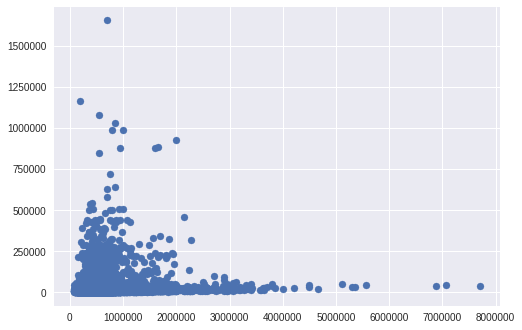

In [13]:
plt.scatter(data['price'], data['area_total'])

if we use the linear regression here it will not give the accurate result becase the plot is not well scattered. to get the good result plot should have good variace.
be we will take that risk and try to derermine the result and see what would be the result.

In [0]:
#prepair the data for train and the test
train_x, test_x, train_y, test_y = train_test_split(data[['area_total']], data[['price']], test_size= 0.2)

now we will will get the linear regression object

In [0]:
model = linear_model.LinearRegression()
# we wil train our model using the data which we have
model.fit(train_x, train_y)

# now its time to predict the data
predict_price = model.predict(test_x)



Now we will check the result and predict it. as we will using matrics as mean_squared_error and r2_score we will talk about them in details.


In [17]:
print("coefficients : {}".format(model.coef_))

coefficients : [[0.99876542]]


this is the b1 we interepret it as : how much price will afect to the single unit increase int the area.

In [18]:
print("intercept: {}".format(model.intercept_))

intercept: [519601.27077962]


we interprete intercept as :  as the expected value of price when the base area there .

In [20]:
# mean square error
print("mean squre error : {}".format(mean_squared_error(test_y, predict_price)))

mean squre error : 148016446582.0436


In [22]:
# r^2 test
print("variance : {}".format(r2_score(test_y, predict_price)))

variance : 0.004800688956087762


this is the wors result we get . variance mean if it is 1 then 100% accurate. 

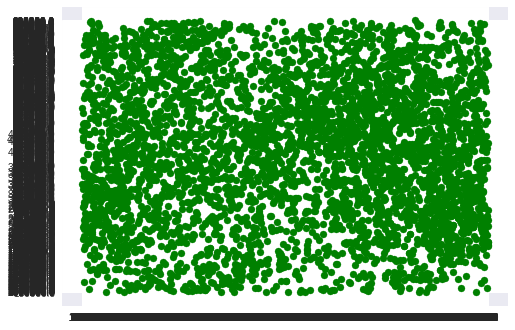

In [24]:
# we will try to plot the result 
plt.scatter(test_x, test_y, color='green')


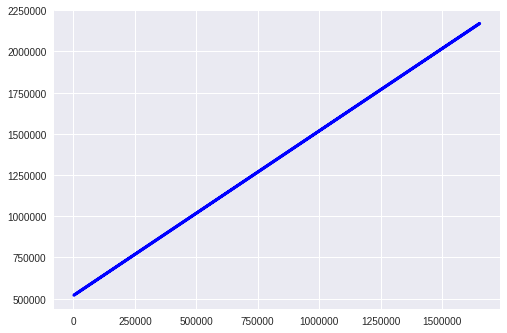

In [25]:
plt.plot(test_x, predict_price, color='blue', linewidth=3)


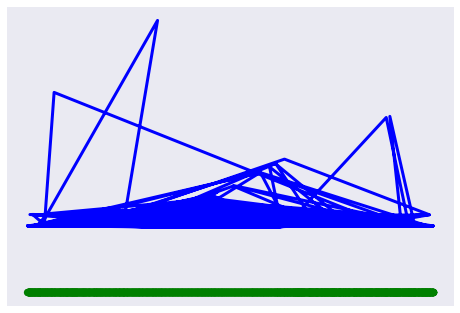

In [27]:
# we will try to plot the result 
plt.scatter(test_x, test_y, color='green')
plt.plot(test_x, predict_price, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()